# Customer Churn Project Using Machine Learning Techniques

### To Predict Customer Churn Model based on various Variables like Customer Profile, Customer Account Information & Services that he has signed up for etc.

### Importing All The Required Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Reading CSV file from Local Disk

In [2]:
churn=pd.read_csv("C:\\Users\\Larry Williams\\Desktop\\Mamata\\Edvancer\\data\\data\\Customer_Churn.csv")

In [3]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Discarding Unwanted Column

In [4]:
churn.drop('customerID', axis=1, inplace=True)

In [5]:
churn['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

### Replacing The Alpahbets and punctation marks

In [6]:
churn["TotalCharges"]=churn["TotalCharges"].str.replace("[^0-9,.]","",regex=True)

### Converting The Total Charges Column From Object to Integer

In [7]:
churn["TotalCharges"]=pd.to_numeric(churn["TotalCharges"])

In [8]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Continous variable plotting

Text(0.5, 1.0, 'HISTOGRAM ')

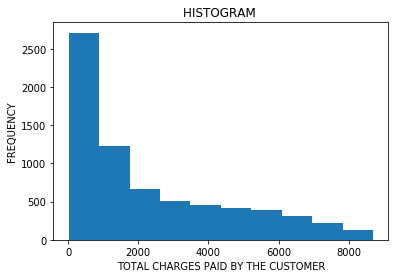

In [10]:
plt.hist(churn["TotalCharges"])
plt.xlabel("TOTAL CHARGES PAID BY THE CUSTOMER")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM ")

Text(0.5, 1.0, 'DISTPLOT')

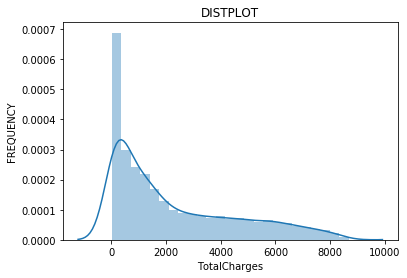

In [11]:
sns.distplot(churn["TotalCharges"])
plt.ylabel("FREQUENCY")
plt.title("DISTPLOT")

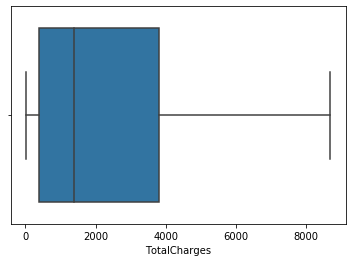

In [12]:
sns.boxplot(churn["TotalCharges"])


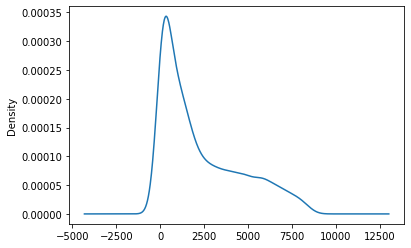

In [13]:
a=pd.Series(churn["TotalCharges"]).plot(kind="density")

### Discrete variable plotting

Text(0.5, 1.0, 'BAR CHART')

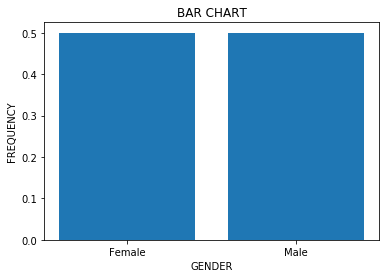

In [14]:
plt.bar(churn["gender"],height=0.5)
plt.xlabel("GENDER")
plt.ylabel("FREQUENCY")
plt.title("BAR CHART")

Text(0.5, 1.0, 'COUNT PLOT')

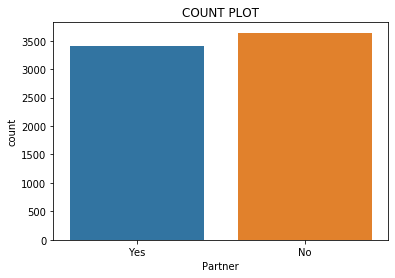

In [15]:
sns.countplot(churn["Partner"])
plt.title("COUNT PLOT")

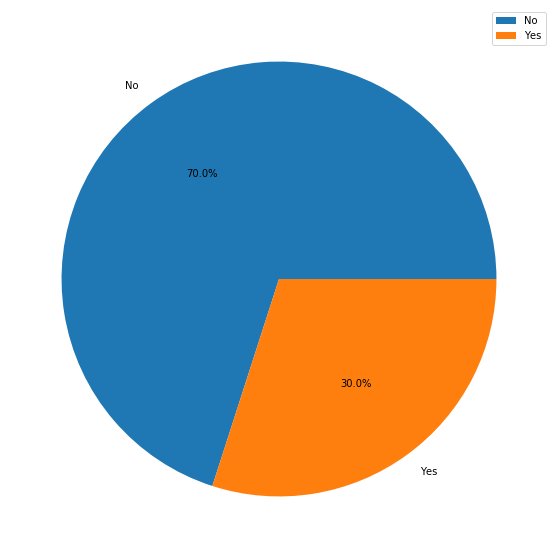

In [16]:
plt.figure(figsize=(10,10))
i=churn["Dependents"].value_counts().values
v=churn["Dependents"].value_counts().index
plt.pie(i,labels=v,autopct="%.1f%%")
plt.legend()

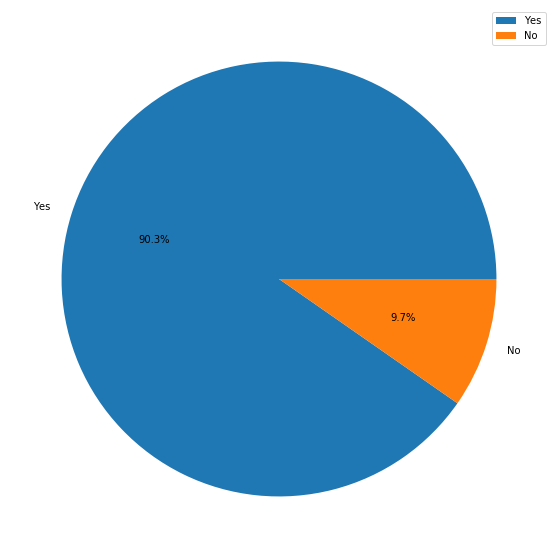

In [17]:
plt.figure(figsize=(10,10))
i=churn["PhoneService"].value_counts().values
v=churn["PhoneService"].value_counts().index
plt.pie(i,labels=v,autopct="%.1f%%")
plt.legend()

### Two continous variables plotting

Text(0.5, 1.0, 'SCATTER PLOT')

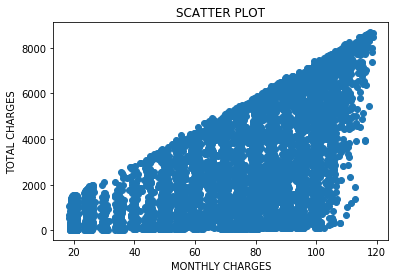

In [18]:
plt.scatter(churn["MonthlyCharges"],churn["TotalCharges"])
plt.xlabel("MONTHLY CHARGES")
plt.ylabel("TOTAL CHARGES")
plt.title("SCATTER PLOT")

Text(0.5, 1.0, 'REG PLOT')

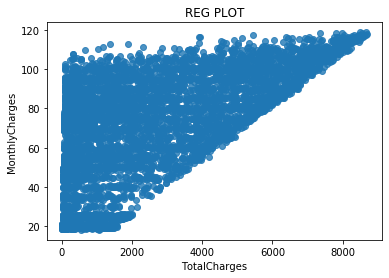

In [19]:
sns.regplot(churn["TotalCharges"],churn["MonthlyCharges"],fit_reg=False)
plt.title("REG PLOT")

### Converting the object columns to one hot encoding

In [20]:
churn=pd.get_dummies(churn,drop_first=True)
churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


### Two discrete variables plotting

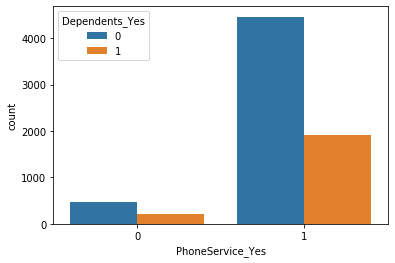

In [21]:
sns.countplot(x="PhoneService_Yes",hue="Dependents_Yes",data=churn)

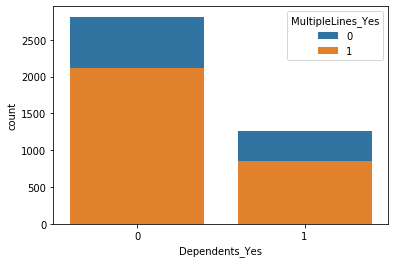

In [22]:
sns.countplot(x="Dependents_Yes",hue="MultipleLines_Yes",data=churn,dodge=False)

### Plotting multiple plots

Text(0, 0.5, 'COUNT')

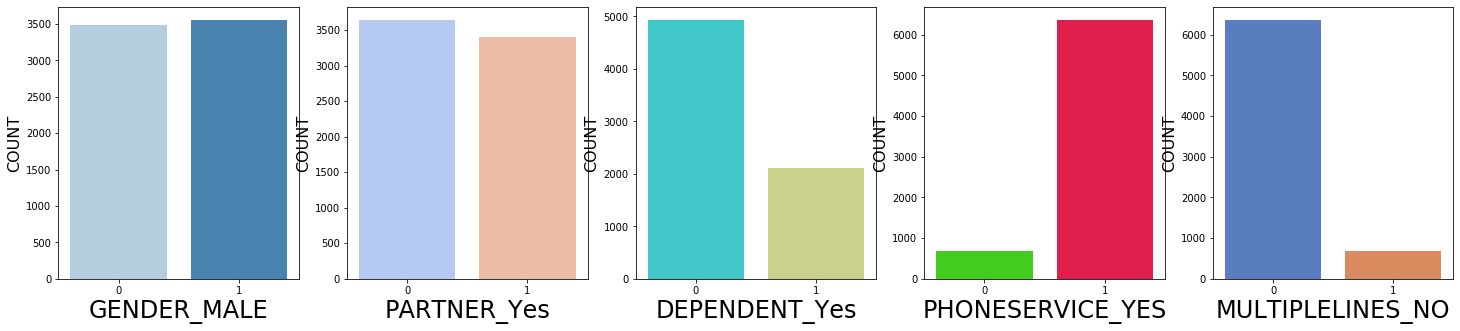

In [23]:
fig,axes=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(churn["gender_Male"],ax=axes[0],palette="Blues")
axes[0].set_xlabel("GENDER_MALE",fontsize=24)
axes[0].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["Partner_Yes"],ax=axes[1],palette="coolwarm")
axes[1].set_xlabel("PARTNER_Yes",fontsize=24)
axes[1].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["Dependents_Yes"],ax=axes[2],palette="rainbow")
axes[2].set_xlabel("DEPENDENT_Yes",fontsize=24)
axes[2].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["PhoneService_Yes"],ax=axes[3],palette="prism")
axes[3].set_xlabel("PHONESERVICE_YES",fontsize=24)
axes[3].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["MultipleLines_No phone service"],ax=axes[4],palette="muted")
axes[4].set_xlabel("MULTIPLELINES_NO",fontsize=24)
axes[4].set_ylabel("COUNT",fontsize=16)

Text(0, 0.5, 'COUNT')

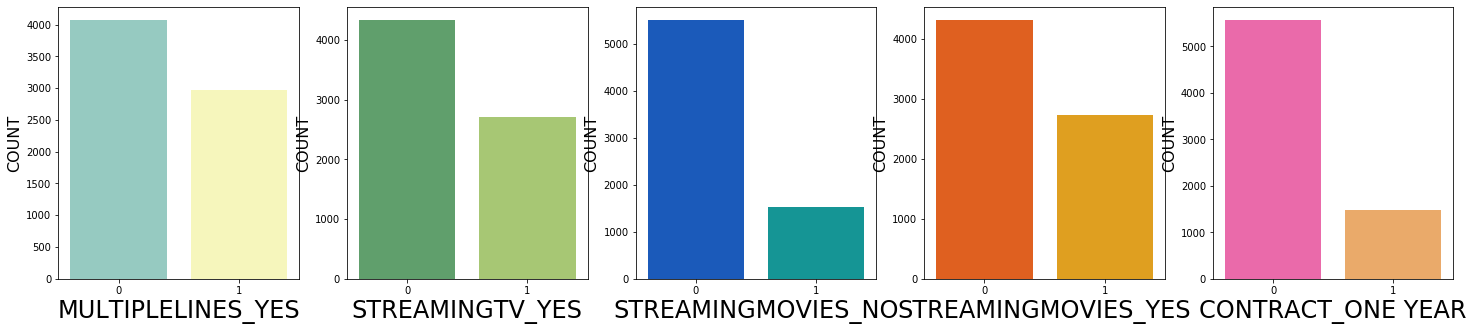

In [24]:
fig,axes=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(churn["MultipleLines_Yes"],ax=axes[0],palette="Set3")
axes[0].set_xlabel("MULTIPLELINES_YES",fontsize=24)
axes[0].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["StreamingTV_Yes"],ax=axes[1],palette="summer")
axes[1].set_xlabel("STREAMINGTV_YES",fontsize=24)
axes[1].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["StreamingMovies_No internet service"],ax=axes[2],palette="winter")
axes[2].set_xlabel("STREAMINGMOVIES_NO",fontsize=24)
axes[2].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["StreamingMovies_Yes"],ax=axes[3],palette="autumn")
axes[3].set_xlabel("STREAMINGMOVIES_YES",fontsize=24)
axes[3].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["Contract_One year"],ax=axes[4],palette="spring")
axes[4].set_xlabel("CONTRACT_ONE YEAR",fontsize=24)
axes[4].set_ylabel("COUNT",fontsize=16)

Text(0, 0.5, 'COUNT')

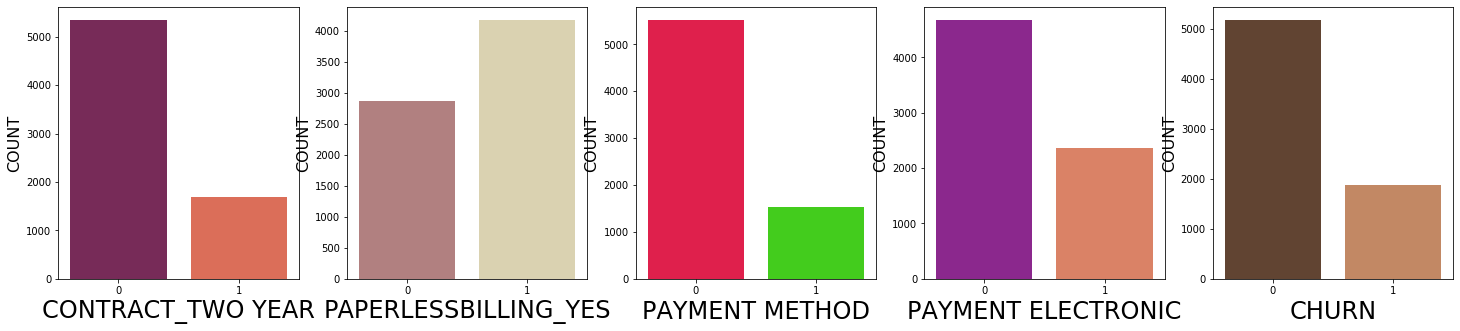

In [25]:
fig,axes=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(churn["Contract_Two year"],ax=axes[0],palette="rocket")
axes[0].set_xlabel("CONTRACT_TWO YEAR",fontsize=24)
axes[0].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["PaperlessBilling_Yes"],ax=axes[1],palette="pink")
axes[1].set_xlabel("PAPERLESSBILLING_YES",fontsize=24)
axes[1].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["PaymentMethod_Credit card (automatic)"],ax=axes[2],palette="prism_r")
axes[2].set_xlabel("PAYMENT METHOD",fontsize=24)
axes[2].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["PaymentMethod_Electronic check"],ax=axes[3],palette="plasma")
axes[3].set_xlabel("PAYMENT ELECTRONIC",fontsize=24)
axes[3].set_ylabel("COUNT",fontsize=16)
sns.countplot(churn["Churn_Yes"],ax=axes[4],palette="copper")
axes[4].set_xlabel("CHURN",fontsize=24)
axes[4].set_ylabel("COUNT",fontsize=16)

### Dropping null values from total charges column

In [26]:
churn.dropna(axis=0,how="any",inplace=True)

### Splitting the input and target variable

In [27]:
a=churn.drop(["Churn_Yes"],axis=1)
b=churn["Churn_Yes"]

### Importing All the Required Algorithms From SKlearn Package

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [33]:
log=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,max_leaf_nodes=10,random_state=123)
rf=RandomForestClassifier(n_estimators=300,max_depth=8,min_samples_leaf=10,max_features="auto",random_state=123)
gb=GradientBoostingClassifier(n_estimators=500,max_depth=12,learning_rate=0.01,max_features="sqrt",subsample=0.3,random_state=123)
xg=XGBClassifier(n_estimators=300,subsample=0.5,learning_rate=0.01)
nb=GaussianNB()
k=KNeighborsClassifier(n_neighbors=7)
s=SVC(kernel="rbf",C=0.01,gamma=0.5,probability=True)

In [31]:
!pip install xgboost

  Using cached xgboost-1.5.0-py3-none-win_amd64.whl (106.6 MB)


### Splitting the data into train and test

In [34]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=123)

### Splitting the data into train and validation sets

In [35]:
x_val,x_test1,y_val,y_test1=train_test_split(x_test,y_test,test_size=0.3,random_state=123)
eval=[(x_train,y_train),(x_val,y_val)]

### Fitting all the models

In [36]:
log.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
gb.fit(x_train,y_train)
xg.fit(x_train,y_train)
nb.fit(x_train,y_train)
k.fit(x_train,y_train)
s.fit(x_train,y_train)

[09:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Vizuvalising the Feature Importance

(0.0, 0.25)

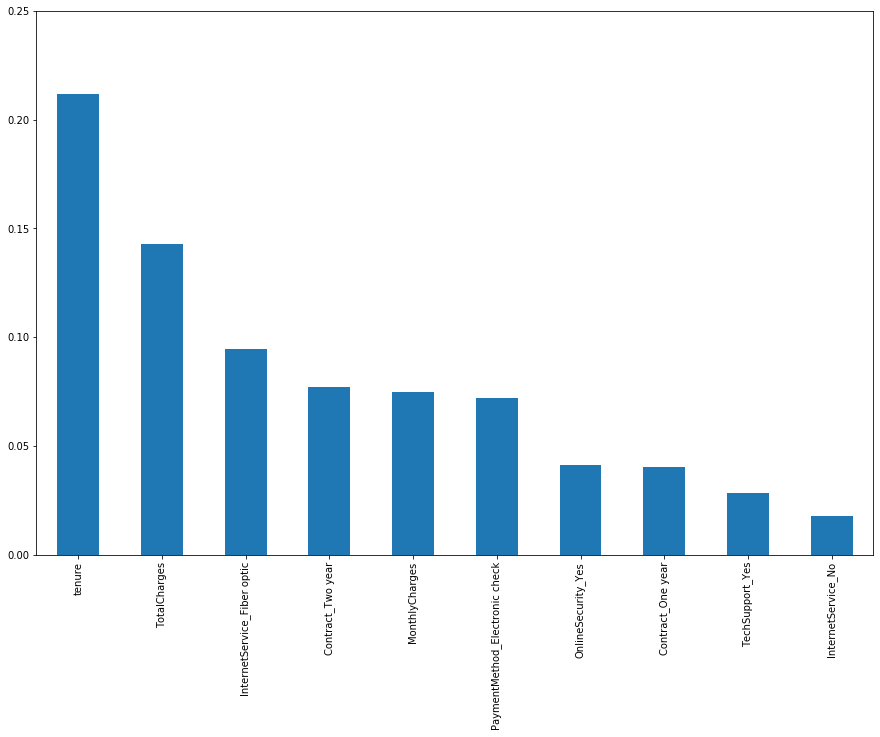

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
c=pd.Series(rf.feature_importances_,index=x_train.columns)
c.nlargest(10).plot(kind="bar")
plt.ylim(0.0,0.25)

In [38]:
pred=log.predict(x_test1)
pred1=dt.predict(x_test1)
pred2=rf.predict(x_test1)
pred3=gb.predict(x_test1)
pred4=xg.predict(x_test1)
pred5=nb.predict(x_test1)
pred6=k.predict(x_test1)
pred7=s.predict(x_test1)

### Plotting Confusion Matrix for all models

Text(0.5, 1, 'DECISION TREE CONFUSION MATRIX')

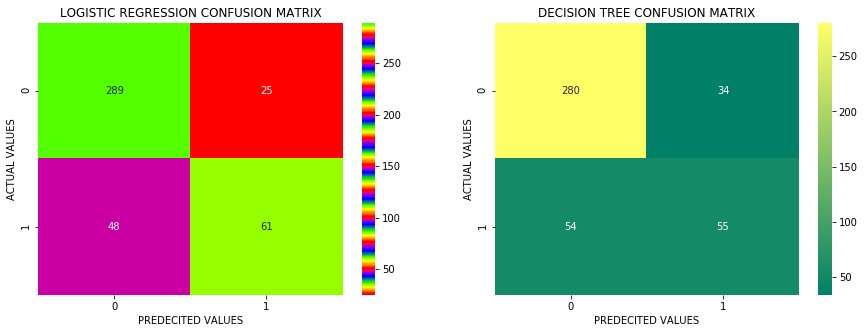

In [39]:
import seaborn as sns
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_test1,pred),annot=True,fmt=".0f",cmap="prism",ax=axes[0])
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("LOGISTIC REGRESSION CONFUSION MATRIX")

sns.heatmap(confusion_matrix(y_test1,pred1),annot=True,fmt=".0f",cmap="summer",ax=axes[1])
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("DECISION TREE CONFUSION MATRIX")

Text(0.5, 1, 'GRADIENT BOOSTING CONFUSION MATRIX')

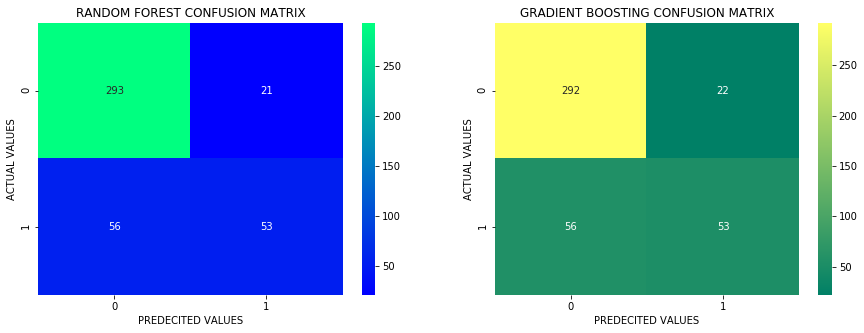

In [40]:
import seaborn as sns
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_test1,pred2),annot=True,fmt=".0f",cmap="winter",ax=axes[0])
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("RANDOM FOREST CONFUSION MATRIX")

sns.heatmap(confusion_matrix(y_test1,pred3),annot=True,fmt=".0f",cmap="summer",ax=axes[1])
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("GRADIENT BOOSTING CONFUSION MATRIX")

Text(0.5, 1, 'GAUSSIAN NAVIE BAYES CONFUSION MATRIX')

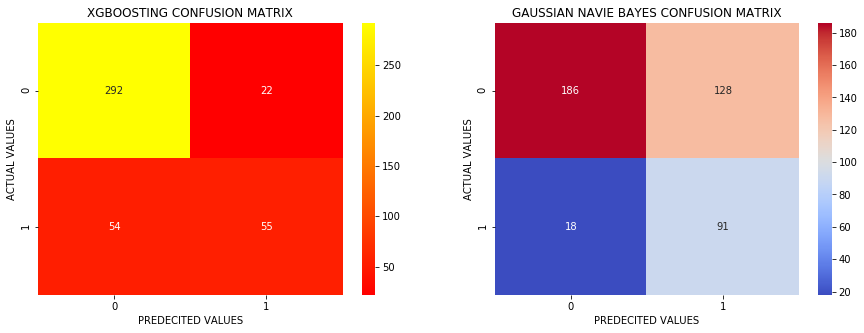

In [41]:
import seaborn as sns
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_test1,pred4),annot=True,fmt=".0f",cmap="autumn",ax=axes[0])
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("XGBOOSTING CONFUSION MATRIX")

sns.heatmap(confusion_matrix(y_test1,pred5),annot=True,fmt=".0f",cmap="coolwarm",ax=axes[1])
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("GAUSSIAN NAVIE BAYES CONFUSION MATRIX")

### Plotting all the metrics

In [42]:
d={
    "PRECISION":[0.71,0.48,0.72,0.74,0.63,0.42,0.61,0.00],
    "RECALL":[0.56,0.49,0.50,0.51,0.52,0.83,0.50,0.00],
}

f={
    "F1-SCORE":[0.63,0.48,0.59,0.61,0.57,0.55,0.55,0.00],
     "ACCURACY":[0.83,0.73,0.82,0.83,0.80,0.65,0.79,0.74]
}

In [44]:
d1=pd.DataFrame(d,index=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","GRADIENT BOOSTING","XG BOOSTING",
                         "GAUSSIAN NAVIE BAYES","K NEAREST NEIGHBOURS","SUPPORT VECTOR MACHINES"])
d1

,PRECISION,RECALL
LOGISTIC REGRESSION,0.71,0.56
DECISION TREE,0.48,0.49
RANDOM FOREST,0.72,0.50
GRADIENT BOOSTING,0.74,0.51
XG BOOSTING,0.63,0.52
GAUSSIAN NAVIE BAYES,0.42,0.83
K NEAREST NEIGHBOURS,0.61,0.50
SUPPORT VECTOR MACHINES,0.00,0.00


In [45]:
f1=pd.DataFrame(f,index=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","GRADIENT BOOSTING","XG BOOSTING",
                         "GAUSSIAN NAVIE BAYES","K NEAREST NEIGHBOURS","SUPPORT VECTOR MACHINES"])
f1

,F1-SCORE,ACCURACY
LOGISTIC REGRESSION,0.63,0.83
DECISION TREE,0.48,0.73
RANDOM FOREST,0.59,0.82
GRADIENT BOOSTING,0.61,0.83
XG BOOSTING,0.57,0.80
GAUSSIAN NAVIE BAYES,0.55,0.65
K NEAREST NEIGHBOURS,0.55,0.79
SUPPORT VECTOR MACHINES,0.00,0.74


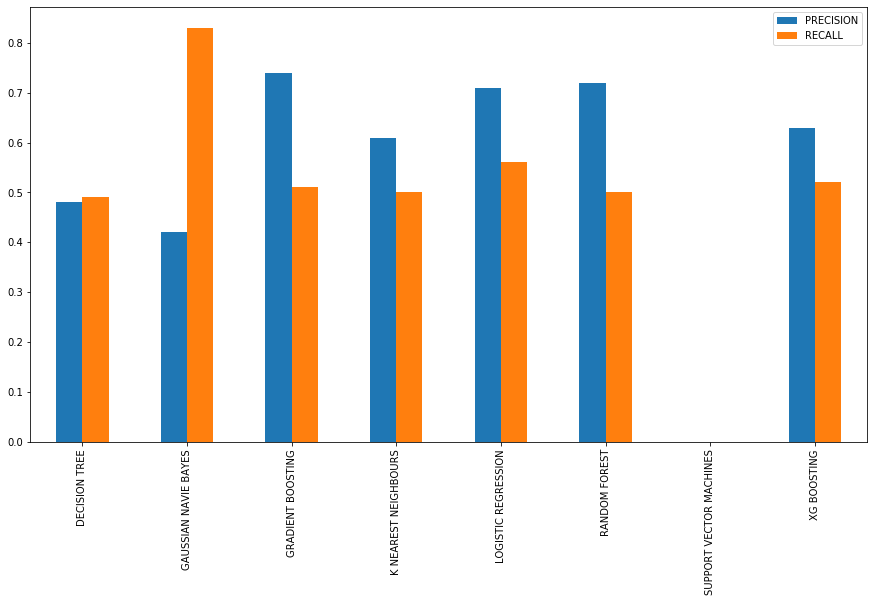

In [46]:
d1.sort_index().plot(kind="bar",figsize=(15,8))

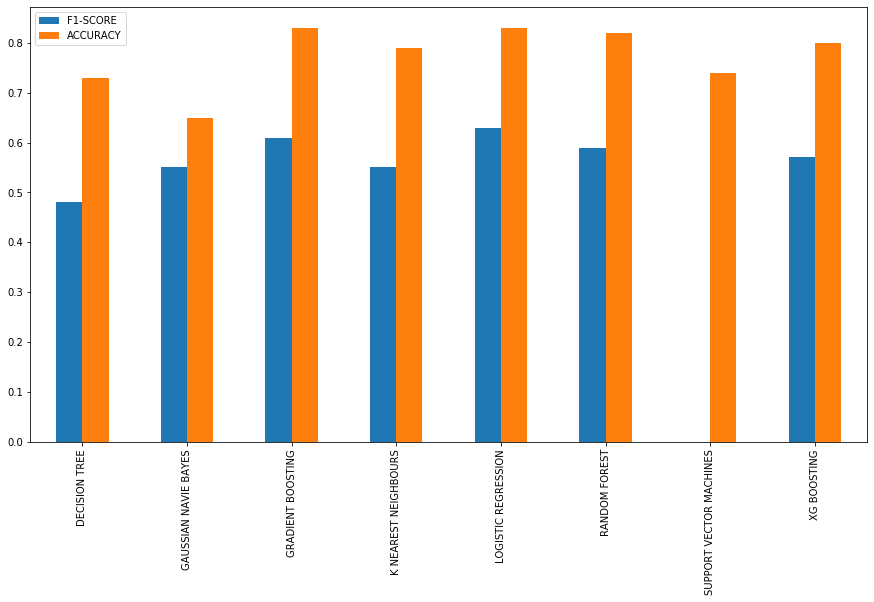

In [47]:
f1.sort_index().plot(kind="bar",figsize=(15,8))

### Vizuvalising the tree plot from decision tree

No handles with labels found to put in legend.


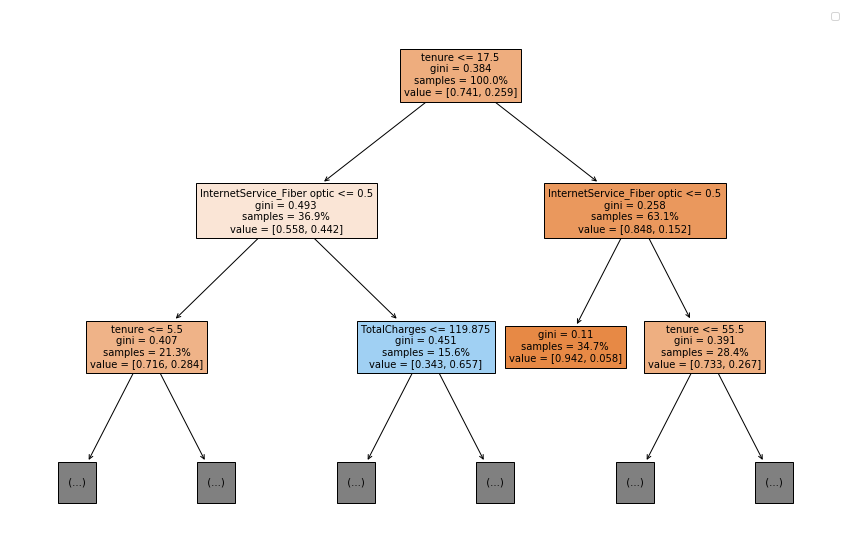

In [48]:
plt.figure(figsize=(15,10))
plot_tree(dt,feature_names=x_train.columns,filled=True,proportion=True,max_depth=2,fontsize=10)
plt.legend()

### Plotting the Roc Curve and AUC score of all algorithms

In [49]:
from sklearn.metrics import roc_curve,roc_auc_score

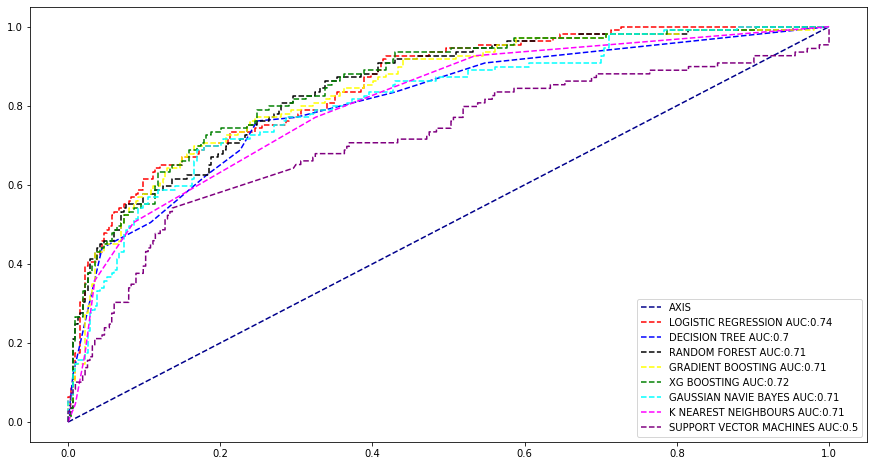

In [53]:
plt.figure(figsize=(15,8))
predict=log.predict_proba(x_test1) [:,1]
predict1=dt.predict_proba(x_test1) [:,1]
predict2=rf.predict_proba(x_test1) [:,1]
predict3=gb.predict_proba(x_test1) [:,1]
predict4=xg.predict_proba(x_test1) [:,1]
predict5=nb.predict_proba(x_test1) [:,1]
predict6=k.predict_proba(x_test1) [:,1]
predict7=s.predict_proba(x_test1) [:,1]
fpr,tpr,t=roc_curve(y_test1,predict)
fpr1,tpr1,t1=roc_curve(y_test1,predict1)
fpr2,tpr2,t2=roc_curve(y_test1,predict2)
fpr3,tpr3,t3=roc_curve(y_test1,predict3)
fpr4,tpr4,t4=roc_curve(y_test1,predict4)
fpr5,tpr5,t5=roc_curve(y_test1,predict5)
fpr6,tpr6,t6=roc_curve(y_test1,predict6)
fpr7,tpr7,t7=roc_curve(y_test1,predict7)
plt.plot([0,1],[0,1],"--",color='darkblue',label="AXIS")
plt.plot(fpr,tpr,"--",color="red",label="LOGISTIC REGRESSION AUC:"+str(round(roc_auc_score(y_test1,pred*100),2)))
plt.plot(fpr1,tpr1,"--",color="blue",label="DECISION TREE AUC:"+str(round(roc_auc_score(y_test1,pred1*100),2)))
plt.plot(fpr2,tpr2,"--",color="black",label="RANDOM FOREST AUC:"+str(round(roc_auc_score(y_test1,pred2*100),2)))
plt.plot(fpr3,tpr3,"--",color="yellow",label="GRADIENT BOOSTING AUC:"+str(round(roc_auc_score(y_test1,pred3*100),2)))
plt.plot(fpr4,tpr4,"--",color="green",label="XG BOOSTING AUC:"+str(round(roc_auc_score(y_test1,pred4*100),2)))
plt.plot(fpr5,tpr5,"--",color="cyan",label="GAUSSIAN NAVIE BAYES AUC:"+str(round(roc_auc_score(y_test1,pred5*100),2)))
plt.plot(fpr6,tpr6,"--",color="magenta",label="K NEAREST NEIGHBOURS AUC:"+str(round(roc_auc_score(y_test1,pred6*100),2)))
plt.plot(fpr7,tpr7,"--",color="purple",label="SUPPORT VECTOR MACHINES AUC:"+str(round(roc_auc_score(y_test1,pred7*100),2)))
plt.legend()